<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [8]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [9]:
train_data = train.flow_from_directory('/content/drive/MyDrive/data', target_size=(120,120), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/data_test', target_size=(120,120), class_mode='categorical')

Found 1391 images belonging to 7 classes.
Found 323 images belonging to 7 classes.


In [10]:
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

train_index : {'Corn_Blight': 0, 'Corn_Common_Rust': 1, 'Corn_Gray_Leaf_Spot': 2, 'Corn_Healthy': 3, 'bean_healthy': 4, 'bean_leaf_spot': 5, 'bean_rust': 6}
test_index: {'Corn_Blight': 0, 'Corn_Common_Rust': 1, 'Corn_Gray_leaf_spot': 2, 'Corn_Heathy': 3, 'bean_healthy': 4, 'bean_leaf_spot': 5, 'bean_rust': 6}


In [11]:
model= Sequential()
## lop CNN1
model.add(Conv2D(64, kernel_size=(3,3), activation='linear',input_shape=(120,120,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(256,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN4
model.add(Conv2D(512,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN5
model.add(Conv2D(256,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

classes = 7

In [12]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(256,activation='linear'))
model.add(Dropout(0.5))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128,activation='linear'))
model.add(Dropout(0.5))
# lop outpu
model.add(Dense(classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 120, 120, 64)      1792      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 120, 120, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 60, 60, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                  

In [14]:
history=model.fit(train_data,epochs=30,batch_size=128,verbose=1, 
                  validation_data=test_data)

Epoch 1/30
44/44 [==============================] - 551s 12s/step - loss: 1.7745 - accuracy: 0.2689 - val_loss: 1.9367 - val_accuracy: 0.2167
Epoch 2/30
44/44 [==============================] - 220s 5s/step - loss: 1.5145 - accuracy: 0.3932 - val_loss: 1.5994 - val_accuracy: 0.3560
Epoch 3/30
44/44 [==============================] - 221s 5s/step - loss: 1.2785 - accuracy: 0.4874 - val_loss: 1.2358 - val_accuracy: 0.5046
Epoch 4/30
44/44 [==============================] - 218s 5s/step - loss: 1.1648 - accuracy: 0.5536 - val_loss: 1.2285 - val_accuracy: 0.5201
Epoch 5/30
44/44 [==============================] - 220s 5s/step - loss: 0.9911 - accuracy: 0.5902 - val_loss: 1.0887 - val_accuracy: 0.5356
Epoch 6/30
44/44 [==============================] - 222s 5s/step - loss: 0.9568 - accuracy: 0.6211 - val_loss: 1.1254 - val_accuracy: 0.5294
Epoch 7/30
44/44 [==============================] - 219s 5s/step - loss: 0.8488 - accuracy: 0.6664 - val_loss: 0.9766 - val_accuracy: 0.6068
Epoch 8/30
4

In [15]:
value=model.evaluate(test_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 1.0964778661727905
accuracy 0.7089783549308777


In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelfinal1.h5')

<ipython-input-17-1135c77880a8>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


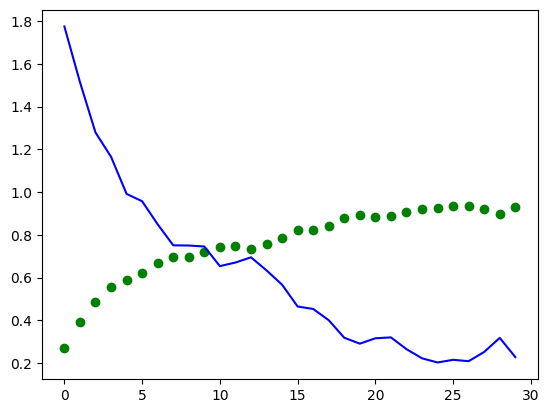

In [17]:
model.save('/content/drive/MyDrive/MyPicture/VN_Foods_Data/model_food.h5')
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

In [18]:
name_foods=['Banh cuon', 'Banh mi','Banh xeo','Bun bo Hue','Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
filePath = '/content/drive/MyDrive/MyPicture/VN_Foods/bun_dau.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)

FileNotFoundError: ignored